In [1]:
import os
import glob
import numpy as np
import pandas as pd
import folderstats
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import matplotlib.pyplot as plt

In [2]:
path_fig=os.getcwd()+'/paper/tex_source/figures/'

In [3]:
df=folderstats.folderstats("./",ignore_hidden=True)

In [4]:
for k in range(df.shape[0]):
    if df.loc[k,"folder"]:
        suff='/'
    else:
        suff=''
    df.loc[k,"path"]=str(df.loc[k,"path"][2:])+suff

In [5]:
idx=df["extension"].isin(["py","pyx","None",None])
df=df[idx].copy()

In [6]:
df.columns

Index(['id', 'path', 'name', 'extension', 'size', 'atime', 'mtime', 'ctime',
       'folder', 'num_files', 'depth', 'parent', 'uid'],
      dtype='object')

In [7]:
cols=['id', 'path', 'name', 'extension',  'folder', 'depth', 'parent',]
df=df[cols]
folders=["pipest","sdhawkes","build","resources","modelling","lobster","calibration","tests","py_scripts","data"]
idx=np.logical_or(df["folder"]==False,np.logical_and(df["folder"]==True,df["name"].isin(folders)))
df=df[idx]

In [8]:

idx1=df["name"].isin(["build","temp.linux-x86_64-3.7","home","claudio"])
idx=np.logical_not(idx1)
df=df[idx]

In [9]:
idx=np.logical_not(df["path"].isin(list(glob.glob("**/paper*/**",recursive=True))))
df=df[idx]

In [10]:
idx=np.logical_not(df["path"].isin(list(glob.glob("**/wrapper_submission*",recursive=True))))
df=df[idx]

In [11]:
idx=np.logical_not(df["path"].isin(list(glob.glob('**/build/*.linux-x86_64-3.7/**',recursive=True))))
df=df[idx]

In [12]:
idx=np.logical_not(df["path"].isin(list(glob.glob('**/lobster_for_sdhawkes/data/**',recursive=True))))
df=df[idx]

In [13]:
idx=np.logical_not(df["path"].isin(list(glob.glob('**/tests/**',recursive=True))))
df=df[idx]

In [14]:
idx=np.logical_not(df["path"].isin(list(glob.glob('**/models/**',recursive=True))))
df=df[idx]

In [15]:
idx=np.logical_not(df["path"].isin(list(glob.glob('**/__pycache__*',recursive=True))))
df=df[idx]

In [16]:
idx=np.logical_not(df["path"].isin(list(glob.glob('**/setup_*',recursive=True))))
df=df[idx]

In [17]:
idx=np.logical_not(df["extension"].isin(["sh"]))
df=df[idx]

In [18]:
idx=np.logical_not(df["name"].isin(["produce_dates","header","setup"]))
df=df[idx]

In [19]:
idx=np.logical_not(df["depth"]>=4)
df=df[idx]

In [20]:
df.sort_values(by='id',inplace=True)
df.reset_index(inplace=True,drop=True)
df.reset_index(inplace=True)

In [21]:
cols=list(df.columns)
cols[0]="pnt"
cols[3]='file'
df.columns=cols

In [22]:
# G.nodes.data()

In [23]:
keys=df.loc[:,["pnt","id"]].copy()

In [24]:
df.columns

Index(['pnt', 'id', 'path', 'file', 'extension', 'folder', 'depth', 'parent'], dtype='object')

In [25]:
cols=list(keys.columns)
cols[0]="par_pnt"
keys.columns=cols
#keys

In [26]:
df=df.merge(keys,how="left",left_on="parent",right_on="id").drop(columns=["id_y"])
idx=pd.isna(df["par_pnt"]).values
df.loc[idx,"par_pnt"]=-1
df["par_pnt"]=df["par_pnt"].astype(np.int)

In [27]:
df.columns

Index(['pnt', 'id_x', 'path', 'file', 'extension', 'folder', 'depth', 'parent',
       'par_pnt'],
      dtype='object')

In [28]:
df.drop(columns=["id_x","parent"],inplace=True)
cols=list(df.columns)
cols[0]="id"
cols[-1]="parent"
df.columns=cols

In [29]:
cols=list(df.columns)
newcols=[]
newcols.append(cols[0])
newcols.append(cols[5])
newcols.append(cols[2])
newcols.append(cols[3])
newcols.append(cols[-1])
newcols.append(cols[4])
newcols.append(cols[1])
df=df[newcols]
df

,id,depth,file,extension,parent,folder,path
0,0,1,pipest,None,-1,True,pipest/
1,1,2,sdhawkes,None,0,True,pipest/sdhawkes/
2,2,3,modelling,None,1,True,pipest/sdhawkes/modelling/
3,3,3,lob_model,pyx,2,False,pipest/sdhawkes/modelling/lob_model.pyx
4,4,3,model,pyx,2,False,pipest/sdhawkes/modelling/model.pyx
5,5,3,resources,None,1,True,pipest/sdhawkes/resources/
6,6,3,computation,pyx,5,False,pipest/sdhawkes/resources/computation.pyx
7,7,3,impact_profile,pyx,5,False,pipest/sdhawkes/resources/impact_profile.pyx
8,8,3,plot_tools,py,5,False,pipest/sdhawkes/resources/plot_tools.py
9,9,3,mle_estimation,pyx,5,False,pipest/sdhawkes/resources/mle_estimation.pyx


In [30]:
df[["id","depth","file","extension","parent","path"]]

,id,depth,file,extension,parent,path
0,0,1,pipest,None,-1,pipest/
1,1,2,sdhawkes,None,0,pipest/sdhawkes/
2,2,3,modelling,None,1,pipest/sdhawkes/modelling/
3,3,3,lob_model,pyx,2,pipest/sdhawkes/modelling/lob_model.pyx
4,4,3,model,pyx,2,pipest/sdhawkes/modelling/model.pyx
5,5,3,resources,None,1,pipest/sdhawkes/resources/
6,6,3,computation,pyx,5,pipest/sdhawkes/resources/computation.pyx
7,7,3,impact_profile,pyx,5,pipest/sdhawkes/resources/impact_profile.pyx
8,8,3,plot_tools,py,5,pipest/sdhawkes/resources/plot_tools.py
9,9,3,mle_estimation,pyx,5,pipest/sdhawkes/resources/mle_estimation.pyx


In [31]:
df[["id","depth","file","extension","parent","path"]].to_latex(index=False)

'\\begin{tabular}{rrllrl}\n\\toprule\n id &  depth &                  file & extension &  parent &                                               path \\\\\n\\midrule\n  0 &      1 &                pipest &      None &      -1 &                                            pipest/ \\\\\n  1 &      2 &              sdhawkes &      None &       0 &                                   pipest/sdhawkes/ \\\\\n  2 &      3 &             modelling &      None &       1 &                         pipest/sdhawkes/modelling/ \\\\\n  3 &      3 &             lob\\_model &       pyx &       2 &            pipest/sdhawkes/modelling/lob\\_model.pyx \\\\\n  4 &      3 &                 model &       pyx &       2 &                pipest/sdhawkes/modelling/model.pyx \\\\\n  5 &      3 &             resources &      None &       1 &                         pipest/sdhawkes/resources/ \\\\\n  6 &      3 &           computation &       pyx &       5 &          pipest/sdhawkes/resources/computation.pyx \\\\\n  7

In [32]:
id_model=int(df.loc[df["file"]=="model","id"])
id_computation=int(df.loc[df["file"]=="computation","id"])
id_mle=int(df.loc[df["file"]=="mle_estimation","id"])
id_minim=int(df.loc[df["file"]=="minimisation_algo","id"])
id_cal=int(df.loc[df["file"]=="main","id"])
df["called_by"]=[{}]*len(df)
idx_res=df["parent"]==int(df.loc[df["file"]=="resources","id"])
df.loc[idx_res,"called_by"]=[{0:id_model}]*len(df.loc[idx_res,"called_by"])
idx=df["file"]=="lob_model"
df.loc[idx,"called_by"]={0:id_model}
df.loc[df["file"]=="minimisation_algo","called_by"]=[{0:id_model,1:id_mle}]
df.loc[df["id"]==id_mle,"called_by"]=[{0:id_model,1:id_cal}]
df.loc[df["file"].isin(["read_from_lobster","prepare_from_lobster"]),"called_by"]=[{0:id_cal}]*2
c={}
k=0
for i in list(df.loc[idx_res,"id"].values):
    c[k]=i
    k=k+1
df.loc[df["file"]=="computation","called_by"]=[c]

In [33]:
df.loc[df["file"]=="computation","called_by"]

6    {0: 6, 1: 7, 2: 8, 3: 9, 4: 10, 5: 11, 6: 12, ...
Name: called_by, dtype: object

In [34]:
Gh=nx.DiGraph()
for i,row in df.iterrows():
#     print(row.file)
#     print(row.path)
    Gh.add_node(row.id,file=row.file,extension=row.extension)
    Gh.add_edge(max(row.parent,0),row.id,color='C0',relation='hierarchical')
Gc=nx.DiGraph()
for i,row in df.iterrows():
    for k in row.called_by.values():
        Gc.add_edge(k,row.id,color="red",relation="call")
print(nx.info(Gh))    

Name: 
Type: DiGraph
Number of nodes: 22
Number of edges: 22
Average in degree:   1.0000
Average out degree:   1.0000


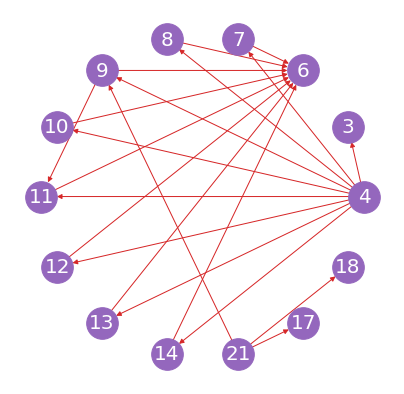

In [47]:
fig = plt.figure(figsize=(7, 7))
nx.draw_networkx(Gc,pos=nx.shell_layout(Gc),font_color="white",edge_color="C3",node_color="C4",node_size=1000, font_size=20)
plt.axis('off')
fname=path_fig+'callG.png'
# plt.savefig(fname)
plt.draw()

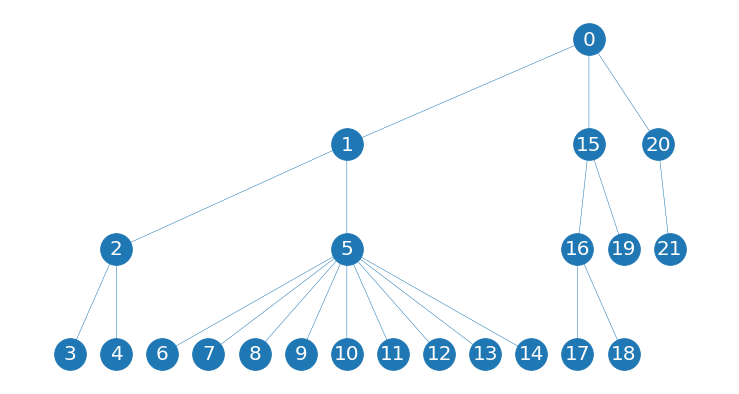

In [46]:
pos_dot = graphviz_layout(Gh, prog='dot')
fig = plt.figure(figsize=(13, 7))
nodes = nx.draw_networkx_nodes(Gh, pos_dot, node_size=1000, node_color='C0')
edges = nx.draw_networkx_edges(Gh, pos_dot,  edge_color="C0",width=0.5)
labels = nx.draw_networkx_labels(Gh, pos_dot, font_color="white", font_size=20)
plt.axis('off')
fname=path_fig+'hierG.png'
# plt.savefig(fname)
plt.show()